In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

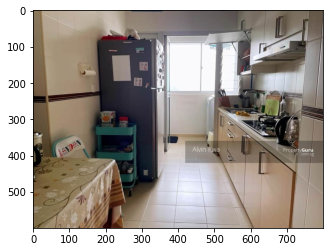

In [2]:
img = cv2.imread(r"./1.jpg")
plt.imshow(img[:,:,::-1])

In [9]:
#########  彩色转黑白图 cv2 ##########
img = cv2.imread(r"./1.jpg")
image=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

cv2.imshow("aa",image)
cv2.waitKey(0)
cv2.destoryAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

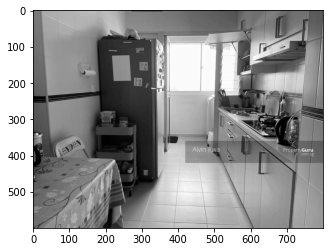

In [40]:
#########  直接读黑白图 ##########
img = cv2.imread(r"./1.jpg",0)
plt.imshow(image,cmap=plt.cm.gray)
# cv2.imwrite(r"../1gray.jpg",img)

#########  彩色转黑白图 plt ##########
# img = cv2.imread(r"../1.jpg")
# image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
# plt.imshow(image,cmap=plt.cm.gray)

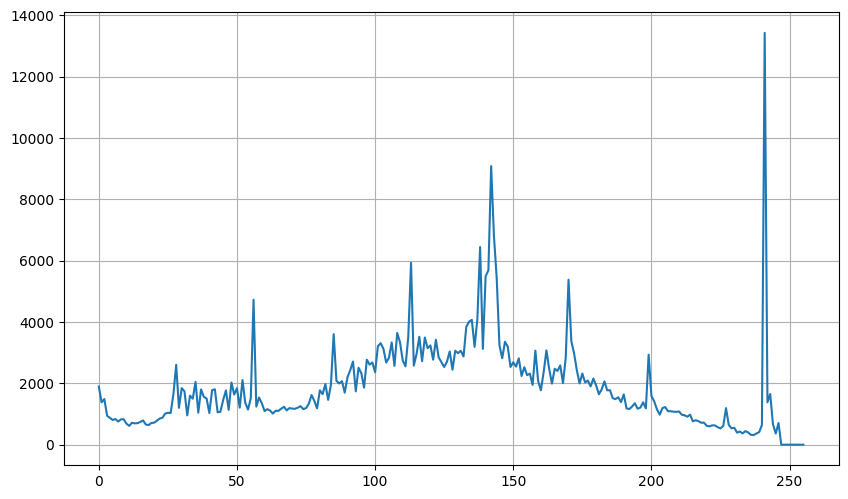

In [30]:
histr=cv2.calcHist([img],[0],None,[256],[0,265])
plt.figure(figsize=(10,6),dpi=100)
plt.plot(histr)
plt.grid()
plt.show()

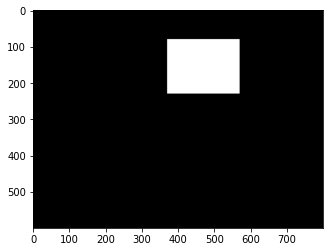

In [56]:
mask=np.zeros(img.shape[:2],np.uint8)
mask[80:230,370:570] =1
plt.imshow(mask,cmap=plt.cm.gray)


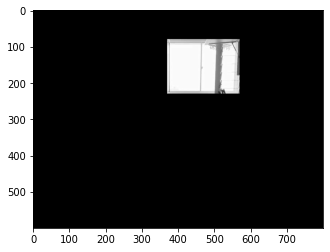

In [57]:
masked_img=cv2.bitwise_and(img,img,mask=mask)
plt.imshow(masked_img,cmap=plt.cm.gray)

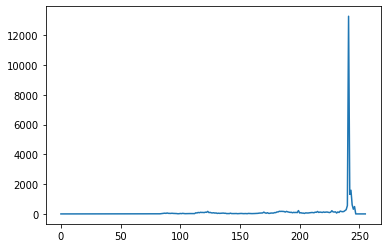

In [58]:
mask_hist=cv2.calcHist([img],[0],mask,[256],[0,265])
plt.plot(mask_hist)
plt.show()

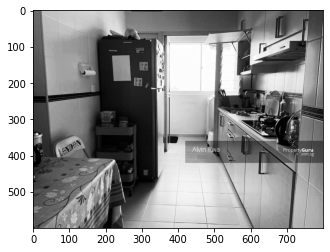

In [59]:
########## 直方图均衡化  ##############
dst=cv2.equalizeHist(img)
plt.imshow(dst,cmap=plt.cm.gray)

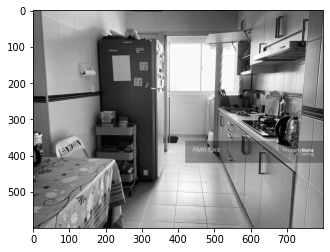

In [61]:
########## 自适应均衡化  ##############
clahe = cv2.createCLAHE(1.0,(4,4))
cl1 = clahe.apply(image)

plt.imshow(cl1,cmap=plt.cm.gray)

# cv2.imshow("aa",cl1)
# cv2.waitKey(0)
# cv2.destoryAllWindows()


In [53]:
########## Shi-Tomas  角点检测 ###################
###### 读取图像 ###########
img = cv2.imread(r"./1.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
print(image.shape)
####### 角点检测 必须是灰度图 #######
corners = cv2.goodFeaturesToTrack(gray_img,1000,0.05,10)
corners.shape

(600, 800)


(395, 1, 2)

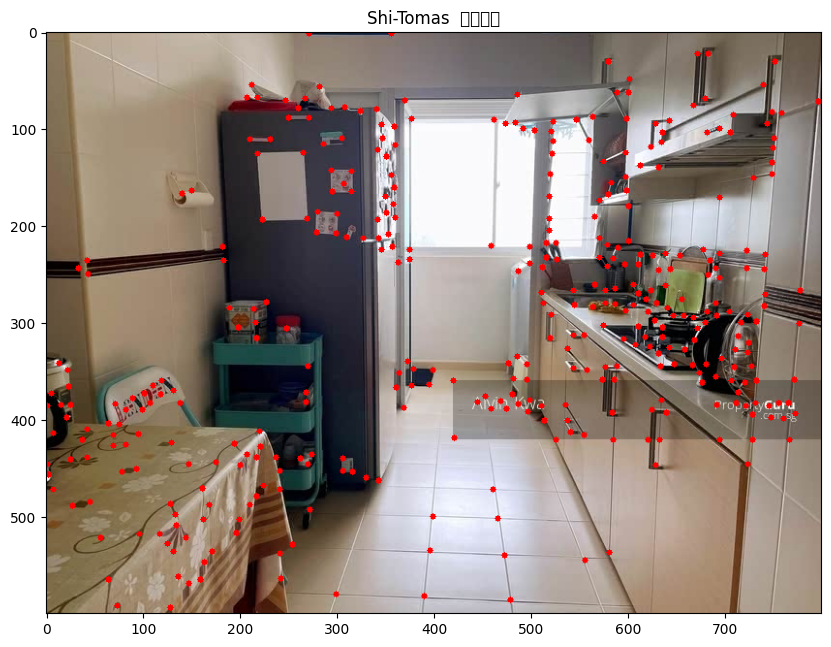

In [55]:
####### 绘制角点 #############
for i in corners:
    x,y = i.ravel()
#     print(x,y)
    cv2.circle(img,(int(x),int(y)), 3, (0,0,255), -1)
    

####### 图像显示 #############
plt.figure(figsize=(10,8),dpi=100)
plt.imshow(img[:,:,::-1])
plt.title("Shi-Tomas  角点检测")
plt.show()